In [1]:
from decision_tree import Node, get_observations, make_subtree
# import decision_tree
import random

In [2]:
filepath = './Homework 2 data/Dbig.txt'
obs = get_observations(filepath)
# obs[:5]

train_set_size = 8192
random.seed(42)
obs_permuted = random.sample(obs, len(obs))
obs_train = obs_permuted[:train_set_size]
obs_test = obs_permuted[train_set_size:]
# obs_permuted[:5]

In [5]:
# accuracy metric
def acc(root, test_set):
    return sum(1 if o[2] == root.classify(o) else 0 for o in test_set) / len(test_set)

n_values = [32, 128, 512, 2048, 8192]
answers = []

# fill answer with (decision tree, n used to train tree, number of nodes in tree, err on test set for this tree)
for n in n_values:
    obs_n = obs_train[:n]
    root = make_subtree(obs_n)
    num_nodes_in_tree = root.count_nodes()
    err_n = 1 - acc(root, obs_test)
    ans = (n, num_nodes_in_tree, err_n)
    print(ans) ### 7.1 "List n, number of nodes in that tree, errn"
    answers.append((root, n, num_nodes_in_tree, err_n))

(32, 5, 0.27876106194690264)
(128, 5, 0.25719026548672563)
(512, 7, 0.23949115044247793)
(2048, 7, 0.2372787610619469)
(8192, 7, 0.23672566371681414)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='n', ylabel='Error'>

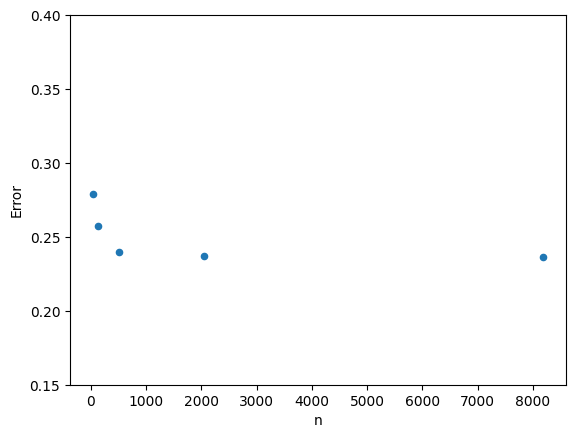

In [25]:
### 2.7.2 "Plot n vs. errn. This is known as a learning curve (a single plot). "
# TODO
df_7 = pd.DataFrame(answers)
df_7.plot(kind='scatter', x=1, y=3, ylim=(0.15,0.4), ylabel='Error', xlabel='n')
# fig, ax = plt.subplots()
# ax.set_ylim(0, 1)
# plot = sns.relplot(data=df, x=1, y=3)
# plot.set_ylim(0,1)
# df_7

/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

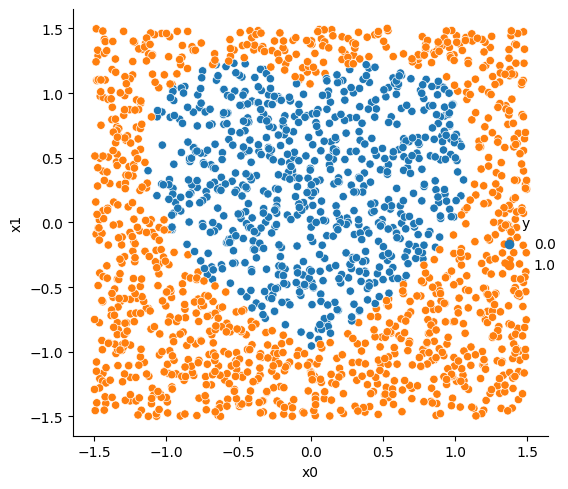

In [28]:
### 2.7.3 "Visualize your decision trees’ decision boundary (five plots)

# First we plot the test set
colnames = ['x0', 'x1', 'y']
df_7_3_0 = pd.DataFrame(obs_test, columns=colnames)
# df_7_3_0
sns.relplot(data=df_7_3_0, x='x0', y='x1', hue='y').add_legend()


In [30]:
for ans in answers:
    tree = ans[0]
    tree.PrintTree()
    print()

x[1] >= -0.421304
        l: x[0] >= -0.500237
                   l: 0
                   r: 1
        r: 1

x[1] >= -0.685009
        l: x[0] >= -0.680071
                   l: 0
                   r: 1
        r: 1

x[1] >= -0.674748
        l: x[0] >= -0.886842
                   l: 0
                   r: 1
        r: x[0] >= 0.392437
                   l: 1
                   r: 1

x[1] >= -0.467112
        l: x[0] >= 0.882545
                   l: 1
                   r: 0
        r: x[0] >= 0.568229
                   l: 1
                   r: 1

x[1] >= -0.496338
        l: x[0] >= 0.881579
                   l: 1
                   r: 0
        r: x[0] >= 0.5112
                   l: 1
                   r: 1



In [31]:
### 3 sklearn
from sklearn.tree import DecisionTreeClassifier

In [40]:
answers_3 = []

# fill answer with (decision tree, n used to train tree, number of nodes in tree, err on test set for this tree)
for n in n_values:
    obs_n = obs_train[:n]
    X = [o[:1] for o in obs_n]
    y = [o[2] for o in obs_n]
    tree = DecisionTreeClassifier(max_depth=2).fit(X, y)
    num_nodes_in_tree = tree.get_n_leaves()

    X_test = [o[:1] for o in obs_test]
    y_test = [o[2] for o in obs_test]
    pred = tree.predict(X_test)
    acc_sci = sum(1 if pred[i] == y_test[i] else 0 for i in range(len(X_test))) / len(X_test)
    err_n = 1 - acc_sci
    
    ans = (n, num_nodes_in_tree, err_n)
    print(ans) ### 7.1 "List n, number of nodes in that tree, errn"
    answers_3.append((root, n, num_nodes_in_tree, err_n))


(32, 4, 0.28871681415929207)
(128, 3, 0.2936946902654868)
(512, 4, 0.30918141592920356)
(2048, 4, 0.2981194690265486)
(8192, 4, 0.31969026548672563)


<Axes: xlabel='n', ylabel='Error'>

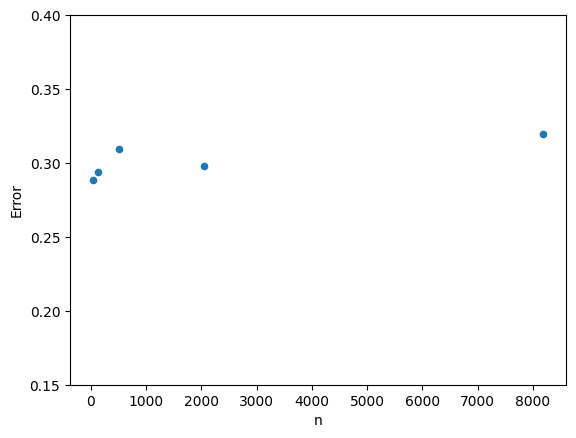

In [43]:
df_3 = pd.DataFrame(answers_3)
df_3.plot(kind='scatter', x=1, y=3, ylim=(0.15,0.4), ylabel='Error', xlabel='n')

In [75]:
### 4 Lagrange Interpolation
from numpy.random import uniform, normal
from numpy.polynomial.polynomial import Polynomial
import numpy as np
import math
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error

In [85]:
low = 0
high = 2*math.pi
lambda_sin = lambda x: np.sin(x)
sin_vec = np.vectorize(lambda_sin)
np.random.seed(42)

num_samples = 100

x_test = uniform(low, high, size=num_samples)
y_test = sin_vec(x_test)

# Base training data with zero error
x = uniform(low, high, size=num_samples)
y = sin_vec(x)

# Gaussian error
# note that the first entry will just be the base training data
stddevs = [0, 0.01, 0.1, 1, 10, 100]
for stddev in stddevs:
    x_train = x + normal(scale=stddev, size=num_samples)
    y_train = sin_vec(x_train)

    f = lagrange(x_train, y_train)
    poly = Polynomial(f.coef[::-1])

    pred_train = poly(x_train)
    lmse_train = math.log(mean_squared_error(y_train, pred_train))

    pred_test = poly(x_test)
    lmse_test = math.log(mean_squared_error(y_test, pred_test))
    print(f'For std dev = {stddev}:')
    print(f'- train log mean squared error = {lmse_train}')
    print(f'- test log mean squared error = {lmse_test}')

For std dev = 0:
- train log mean squared error = 334.43622749096517
- test log mean squared error = 334.6563799257306
For std dev = 0.01:
- train log mean squared error = 333.8524226649329
- test log mean squared error = 333.8384908119607
For std dev = 0.1:
- train log mean squared error = 344.03565365413317
- test log mean squared error = 344.9000597801279
For std dev = 1:
- train log mean squared error = 356.82613749985626
- test log mean squared error = 315.22368624964537
For std dev = 10:
- train log mean squared error = 287.27468349526106
- test log mean squared error = 70.66524084120545
For std dev = 100:
- train log mean squared error = 262.1043764431617
- test log mean squared error = -13.074606868655378
